In [1]:
from generator_model import Generator
from torch import optim
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch.utils.data import DataLoader
from dataset import MapDataset
import config
from tqdm import tqdm

gen = Generator(in_channels=3)
# checkpoint = torch.load("/Users/mohamedmafaz/Downloads/gen.pth.tar", map_location=torch.device(config.DEVICE))
checkpoint = torch.load("/Users/mohamedmafaz/Desktop/Pix2Pix/gen.pth.tar", map_location=torch.device(config.DEVICE))
gen.load_state_dict(checkpoint['state_dict'])
optimizer = optim.Adam(gen.parameters())
optimizer.load_state_dict(checkpoint['optimizer'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/albumentations/check_version.py:49: UserWarning: Error fetching version info <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>
  data = fetch_version_info()
/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_8107/2945467477.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allow

In [2]:
image_pth = "data/maps/val/1.jpg"
input = np.array(Image.open(image_pth))[:, :600, ...]
target = np.array(Image.open(image_pth))[:, 600:, ...]

In [3]:
config.VAL_DIR

'data/drones/val'

In [4]:
from torch.utils.data import DataLoader
from dataset import MapDataset
import config
from tqdm import tqdm

val_dataset = MapDataset(root_dir=config.VAL_DIR)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

all = {"x": [], "y": [], "y_fake": []}

# x, y = next(iter(val_loader))

per = 25
for idx, (x,y) in tqdm(enumerate(val_loader)):
    if idx == per: break
    x, y = x.to(config.DEVICE), y.to(config.DEVICE)
    gen.eval()
    with torch.no_grad():
        y_fake = gen(x)
        y_fake = y_fake * 0.5 + 0.5
        y = y * 0.5 + 0.5
        x = x * 0.5 + 0.5
    all["x"].append(x)
    all["y"].append(y)
    all["y_fake"].append(y_fake)
    

0it [00:00, ?it/s]

2it [00:00,  3.35it/s]


In [5]:
def convert(x):
    return np.moveaxis(np.array(x[0, :, :, :]), 0, -1)

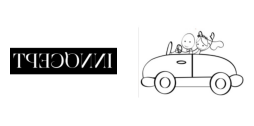

In [6]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, min((columns*rows +1), len(all['x'])) + 1):
    img = convert(all['x'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")


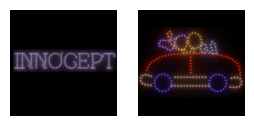

In [7]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, min((columns*rows +1), len(all['x'])) + 1):
    img = convert(all['y'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")


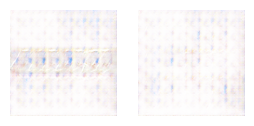

In [8]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, min((columns*rows +1), len(all['x'])) + 1):
    img = convert(all['y_fake'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")